## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df=pd.read_csv("car.csv")

In [3]:
import pandas as pd
from numpy import array
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    values =array(df[i])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    values=pd.DataFrame(integer_encoded)
    df=df.drop([i],axis=1)
    df= pd.concat([values, df], axis=1, join='inner')
    df.rename(columns={0:i}, inplace=True)

In [14]:
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,class,safety,lug_boot,persons,doors,maint,buying
class,1,-0.0210437,0.0331843,-0.299468,-0.0313274,0.0401936,0.0514242
safety,-0.0210437,1,0,0,0,0,0
lug_boot,0.0331843,0,1,0,0,0,0
persons,-0.299468,0,0,1,0,0,0
doors,-0.0313274,0,0,0,1,0,0
maint,0.0401936,0,0,0,0,1,0
buying,0.0514242,0,0,0,0,0,1


In [5]:
#plt.scatter(df.iloc[:,3],df.iloc[:,6])
cl=df.iloc[:,0]
df.drop(["class"],axis=1)
scaler=StandardScaler()
df_std=scaler.fit_transform(df)

In [6]:
pca=PCA()
pca.fit(df_std)
pca.explained_variance_ratio_

array([0.18722727, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.09848702])

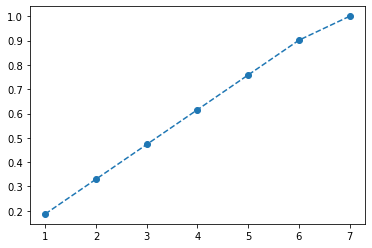

In [7]:
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="--")

In [8]:
pca=PCA(n_components=4)
pca.fit(df_std)
scores_pca=pca.transform(df_std)

## Clustering

#### K-means

In [11]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=4,random_state=42)
labels = kmeans_pca.fit_predict(df)
pca.fit(scores_pca)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
df_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans.columns.values[-4:]=["com1","com2","com3","com4"]
df_pca_kmeans["class k-means pca"]=labels
df_pca_kmeans

,class,safety,lug_boot,persons,doors,maint,buying,com1,com2,com3,com4,class k-means pca
0,2,1,2,0,0,3,3,-1.663820,0.534425,2.006022,-0.783654,0
1,2,2,2,0,0,3,3,-1.605143,1.142401,1.751271,-1.212944,0
2,2,0,2,0,0,3,3,-1.722496,-0.073550,2.260773,-0.354364,0
3,2,1,1,0,0,3,3,-1.571292,0.829880,1.155187,-1.237601,0
4,2,2,1,0,0,3,3,-1.512615,1.437855,0.900436,-1.666891,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,2,1,2,3,1,1,1.529389,0.683482,-0.795798,0.668515,1
1724,3,0,1,2,3,1,1,-0.202926,-0.532469,-0.286297,1.527096,2
1725,2,1,0,2,3,1,1,0.755760,0.370961,-1.391883,0.643859,2
1726,1,2,0,2,3,1,1,1.621917,0.978937,-1.646633,0.214568,1


In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.123, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [103]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

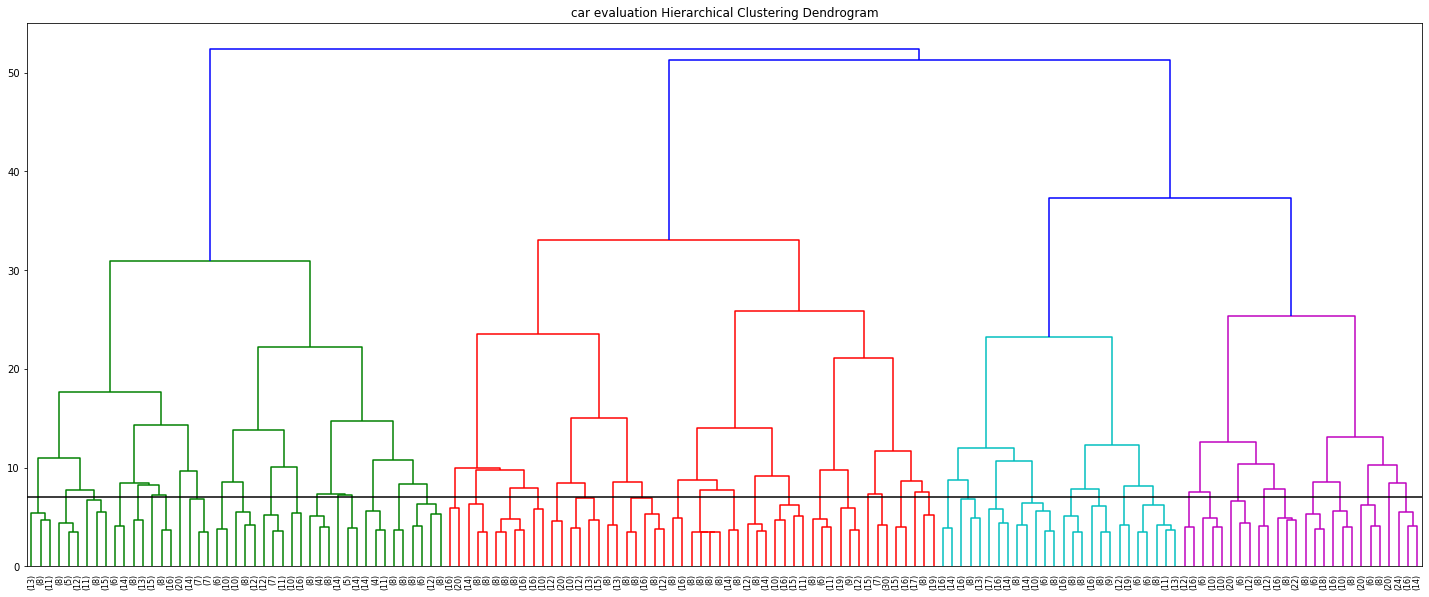

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward')
max_d = 7.08
plt.figure(figsize=(25, 10))
plt.title('car evaluation Hierarchical Clustering Dendrogram')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=150,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.axhline(y=max_d, c='k')
plt.show()